In [1]:
import zenflow as zf

import numpy as np
np.random.seed(seed=369)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
sns.set_style('whitegrid')

y = [0] 	 x = [-0.96082396  0.22287371]
y = [1] 	 x = [ 1.46115081 -0.40519777]
y = [1] 	 x = [ 1.578066   -0.23241627]
y = [0] 	 x = [1.05491563 0.14992138]
y = [1] 	 x = [ 1.4932458  -0.39834706]
y = [0] 	 x = [0.47443626 0.90911671]


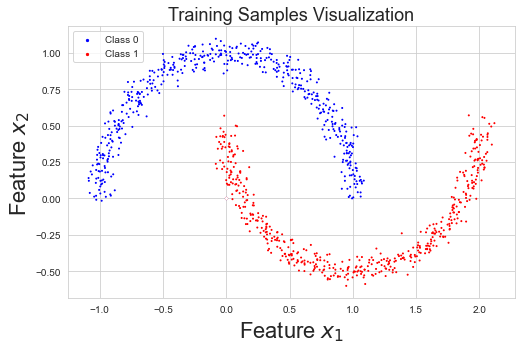

In [2]:
""" synthesis some training data """

data = make_moons(n_samples=1000, shuffle=True, noise=0.05, random_state=None) # Gaussian noise std-dev = 0.05
X = data[0]
Y = np.reshape(data[1], [len(data[1]), 1])

# display first 5 samples
i = 0
for x,y in zip(X,Y):
    print('y =', y, '\t x =', x)
    i+=1
    if i>5:
        break

# Visualize 
color_book = np.array(['blue', 'red']) # blue for class 0, red for class 1

plt.figure(figsize=(8, 5))
plt.scatter(0,0,c='blue',label='Class 0',s=5) # legend for blue dots
plt.scatter(0,0,c='red',label='Class 1',s=5)  # legend for red dots
plt.scatter(0,0,c='white',s=5) # to "erase" the legend dummy dot
plt.scatter(X[:,0], X[:,1], c=color_book[np.reshape(Y, [Y.shape[0]])], s=1)
plt.legend()

plt.xlabel('Feature $x_1$', fontsize=22)
plt.ylabel('Feature $x_2$', fontsize=22)

plt.title('Training Samples Visualization', fontsize=18)
plt.legend(loc=2)
plt.show()

# Mean Squared Error Loss

In [4]:
""" Build the neural network model """

model = zf.sequential(loss_function=zf.mean_squared_loss)

# hidden layers
fc1 = zf.dense_layer(in_dim=2, 
                     out_dim=16, 
                     activation=zf.relu, 
                     initialize='random_uniform')
fc2 = zf.dense_layer(in_dim=16, 
                     out_dim=32, 
                     activation=zf.relu, 
                     initialize='random_uniform')

# output layer
output_layer = zf.dense_layer(in_dim=32, 
                     out_dim=1, 
                     activation=zf.sigmoid, 
                     initialize='random_uniform')

# add layers to the model
model.add_layer(fc1)
model.add_layer(fc2)
model.add_layer(output_layer)

# summarize model
model.summary()

Input dimension: [?, 2]
-----------------------------------------------------
Dense layer 0	 shape: [2, 16]	 activation: relu
Dense layer 1	 shape: [16, 32]	 activation: relu
Dense layer 2	 shape: [32, 1]	 activation: sigmoid
-----------------------------------------------------
Output dimension: [?, 1]
Loss function: mean_squared_loss
Number of parameters: 576


epoch  0  loss  0.19017488410564565
epoch  10  loss  0.04186107801734938
epoch  20  loss  0.03786605091935448
epoch  30  loss  0.035983268996506584
epoch  40  loss  0.034914134304944396
epoch  50  loss  0.034203904321904156
epoch  60  loss  0.03367884705221644
epoch  70  loss  0.033340444081593895
epoch  80  loss  0.03308984752954382
epoch  90  loss  0.03288997857446775
epoch  100  loss  0.032726743861594895
epoch  110  loss  0.03259217989519761
epoch  120  loss  0.032482202979834125
epoch  130  loss  0.03238816920049162
epoch  140  loss  0.03231262459821393
epoch  150  loss  0.032251057060677095
epoch  160  loss  0.03219774859155771
epoch  170  loss  0.03215208931526361
epoch  180  loss  0.032111904281600136
epoch  190  loss  0.03207521228013367
Train accuracy:  0.877


Text(0, 0.5, 'Loss')

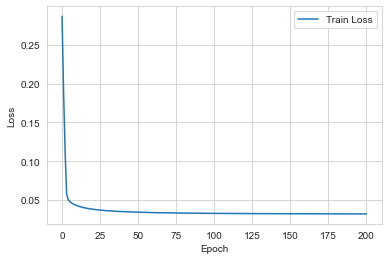

In [5]:
EPOCHS = 200 # total epochs
LR = 1e-3 # learning rate

""" optimize the weight (w) """
hist = [model.model_loss(X, Y)] # track loss values
for epoch in range(EPOCHS):
    model.auto_grad(X, Y)
    model.update_step(learning_rate=LR)
    loss = model.model_loss(X, Y)
    if epoch % 10 == 0:
        print('epoch ', epoch, ' loss ', loss)
    hist.append(loss)
    
# compute accuracy
def accuracy(y_pred, y_true):
    return (y_pred == y_true).mean()
Y_pred = model.predict(X, return_score=False)
print("Train accuracy: ", accuracy(Y_pred, Y))


# plot training loss curve
plt.plot([i for i in range(len(hist))], [h for h in hist], label='Train Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

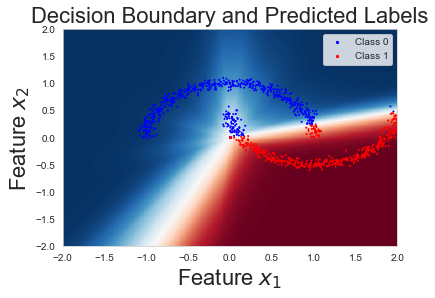

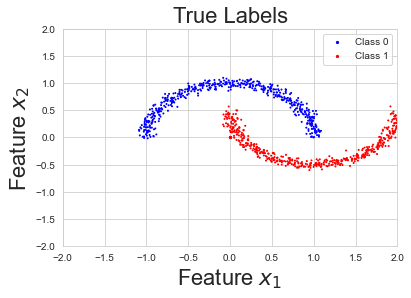

In [6]:
""" Visualize Decision Boundary """

x_1 = np.linspace(-2, 2, num=400)
x_2 = np.linspace(-2, 2, num=400)
X_prob = []
for i in range(len(x_1)):
    for j in range(len(x_2)):
        X_prob.append([x_1[j], x_2[i]])
X_prob = np.array(X_prob)
Y_prob = model.predict(X_prob, return_score=True)
decision_map = np.zeros([len(x_1),len(x_2)])
for i in range(len(x_1)):
    for j in range(len(x_2)):
        decision_map[i,j] = Y_prob[i*len(x_1)+j]

# generate 2 2d grids for the x & y bounds
x, y = np.meshgrid(x_2, x_1)
z = -(decision_map-0.5)*2
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
Y_PRED = model.predict(X, return_score=False)
plt.scatter(0,0,c='blue',label='Class 0',s=5) # legend for blue dots
plt.scatter(0,0,c='red',label='Class 1',s=5)  # legend for red dots
plt.scatter(X[:,0], X[:,1], c=color_book[np.reshape(Y_PRED, [Y_PRED.shape[0]])], s=1)
plt.legend()
plt.xlabel('Feature $x_1$', fontsize=22)
plt.ylabel('Feature $x_2$', fontsize=22)
plt.title('Decision Boundary and Predicted Labels', fontsize=22)
plt.show()

plt.scatter(0,0,c='blue',label='Class 0',s=5) # legend for blue dots
plt.scatter(0,0,c='red',label='Class 1',s=5)  # legend for red dots
plt.scatter(X[:,0], X[:,1], c=color_book[np.reshape(Y, [Y.shape[0]])], s=1)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.legend()
plt.xlabel('Feature $x_1$', fontsize=22)
plt.ylabel('Feature $x_2$', fontsize=22)
plt.title('True Labels', fontsize=22)
plt.show()


# Binary Cross-Entropy Loss

In [16]:
""" Build the neural network model """

model = zf.sequential(loss_function=zf.mean_squared_loss)

# hidden layers
fc1 = zf.dense_layer(in_dim=2, 
                     out_dim=16, 
                     activation=zf.sin, 
                     initialize='random_uniform')
fc2 = zf.dense_layer(in_dim=16, 
                     out_dim=32, 
                     activation=zf.sin, 
                     initialize='random_uniform')
fc3 = zf.dense_layer(in_dim=32, 
                     out_dim=32, 
                     activation=zf.sin, 
                     initialize='random_uniform')

# output layer
output_layer = zf.dense_layer(in_dim=32, 
                     out_dim=1, 
                     activation=zf.sigmoid, 
                     initialize='random_uniform')

# add layers to the model
model.add_layer(fc1)
model.add_layer(fc2)
model.add_layer(fc3)
model.add_layer(output_layer)

# summarize model
model.summary()

Input dimension: [?, 2]
-----------------------------------------------------
Dense layer 0	 shape: [2, 16]	 activation: sin
Dense layer 1	 shape: [16, 32]	 activation: sin
Dense layer 2	 shape: [32, 32]	 activation: sin
Dense layer 3	 shape: [32, 1]	 activation: sigmoid
-----------------------------------------------------
Output dimension: [?, 1]
Loss function: mean_squared_loss
Number of parameters: 1,600


epoch  0  loss  0.029844281332415373
epoch  10  loss  0.005681470643458028
epoch  20  loss  0.004029866988890272
epoch  30  loss  0.0033445819677070067
epoch  40  loss  0.002940636009618979
epoch  50  loss  0.0026666518356899182
epoch  60  loss  0.0024658386305630247
epoch  70  loss  0.002310984247362454
epoch  80  loss  0.00218714777423615
epoch  90  loss  0.002085363358834381
epoch  100  loss  0.001999893591832726
epoch  110  loss  0.0019268811796908727
epoch  120  loss  0.001863628546730535
epoch  130  loss  0.0018081871316190119
epoch  140  loss  0.0017591107759093057
epoch  150  loss  0.0017153011835656547
epoch  160  loss  0.0016759075369309343
epoch  170  loss  0.0016402592582949495
epoch  180  loss  0.0016078197591031461
epoch  190  loss  0.0015781538760428328
Train accuracy:  0.997


Text(0, 0.5, 'Loss')

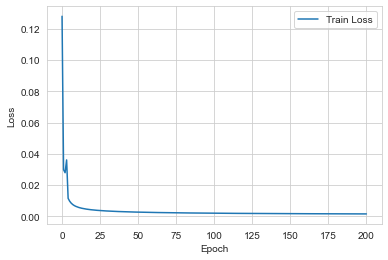

In [17]:
EPOCHS = 200 # total epochs
LR = 1e-3 # learning rate

""" optimize the weight (w) """
hist = [model.model_loss(X, Y)] # track loss values
for epoch in range(EPOCHS):
    model.auto_grad(X, Y)
    model.update_step(learning_rate=LR)
    loss = model.model_loss(X, Y)
    if epoch % 10 == 0:
        print('epoch ', epoch, ' loss ', loss)
    hist.append(loss)
    
# compute accuracy
def accuracy(y_pred, y_true):
    return (y_pred == y_true).mean()
Y_pred = model.predict(X, return_score=False)
print("Train accuracy: ", accuracy(Y_pred, Y))


# plot training loss curve
plt.plot([i for i in range(len(hist))], [h for h in hist], label='Train Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

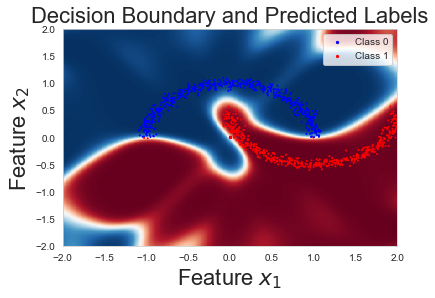

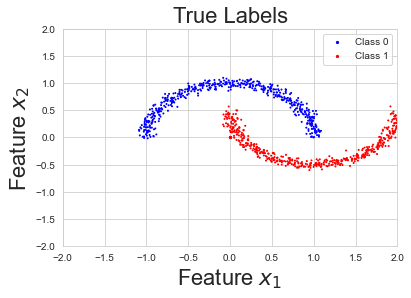

In [18]:
""" Visualize Decision Boundary """

x_1 = np.linspace(-2, 2, num=400)
x_2 = np.linspace(-2, 2, num=400)
X_prob = []
for i in range(len(x_1)):
    for j in range(len(x_2)):
        X_prob.append([x_1[j], x_2[i]])
X_prob = np.array(X_prob)
Y_prob = model.predict(X_prob, return_score=True)
decision_map = np.zeros([len(x_1),len(x_2)])
for i in range(len(x_1)):
    for j in range(len(x_2)):
        decision_map[i,j] = Y_prob[i*len(x_1)+j]

# generate 2 2d grids for the x & y bounds
x, y = np.meshgrid(x_2, x_1)
z = -(decision_map-0.5)*2
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
Y_PRED = model.predict(X, return_score=False)
plt.scatter(0,0,c='blue',label='Class 0',s=5) # legend for blue dots
plt.scatter(0,0,c='red',label='Class 1',s=5)  # legend for red dots
plt.scatter(X[:,0], X[:,1], c=color_book[np.reshape(Y_PRED, [Y_PRED.shape[0]])], s=1)
plt.legend()
plt.xlabel('Feature $x_1$', fontsize=22)
plt.ylabel('Feature $x_2$', fontsize=22)
plt.title('Decision Boundary and Predicted Labels', fontsize=22)
plt.show()

plt.scatter(0,0,c='blue',label='Class 0',s=5) # legend for blue dots
plt.scatter(0,0,c='red',label='Class 1',s=5)  # legend for red dots
plt.scatter(X[:,0], X[:,1], c=color_book[np.reshape(Y, [Y.shape[0]])], s=1)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.legend()
plt.xlabel('Feature $x_1$', fontsize=22)
plt.ylabel('Feature $x_2$', fontsize=22)
plt.title('True Labels', fontsize=22)
plt.show()
